In [1]:
import numpy as np
import pandas as pd
from lazy_diffusion_curvature import curvature
from kernels import alpha_decaying_kernel, estimate_epsilon
import matplotlib.pyplot as plt
from scipy.sparse import bsr_matrix
import magic

In [2]:
# data = np.loadtxt('hyperboloid_cloud_ratio_4.csv', delimiter=',')
# cut_index = np.loadtxt('hyperboloid_cloud_ratio_4_cutted_index.csv', delimiter=',').astype(int)
# our_curvature = np.loadtxt('results/hyperboloid/curvature_hyperboloid_ratio_4_combined.csv')
# non_na_id = ~np.isnan(our_curvature)
# data = data[cut_index]
# data = data[non_na_id]

In [3]:
data = np.loadtxt('torus_cloud_ratio_4.0.csv', delimiter=',')
our_curvature = np.loadtxt('results/torus/curvature_torus_ratio_4.0_combined.csv')
true_curvature = np.loadtxt('torus_K_ratio_4.0.csv')
non_na_id = ~np.isnan(our_curvature)
data = data[non_na_id]

In [4]:
magic_operator = magic.MAGIC(knn=20)
magic_operator.fit(data)

Running MAGIC on 4939 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.10 seconds.
  Calculating affinities...
  Calculated affinities in 0.19 seconds.
Calculated graph and diffusion operator in 0.33 seconds.


MAGIC(knn=20, knn_max=60)

In [5]:
P = magic_operator.graph.P

In [6]:
# epsilon = estimate_epsilon(data)

In [7]:
# epsilon = 0.5

In [8]:
# P = alpha_decaying_kernel(data, epsilon)

In [9]:
P

<4939x4939 sparse matrix of type '<class 'numpy.float64'>'
	with 324079 stored elements in Compressed Sparse Row format>

In [24]:
Ps = bsr_array(P)

In [11]:
# from scipy.sparse import identity
# def sparse_power_efficient(A, n):
#     result = identity(A.shape[0], dtype=A.dtype, format='bsr')
#     temp_A = A.copy()
#     while n > 0:
#         if n % 2 == 1:
#             result = result.dot(temp_A)
#         temp_A = temp_A.dot(temp_A)
#         n //= 2
#     return result

In [25]:
P8 = Ps ** 8
# P8 = sparse_power_efficient(Ps, 8)

In [27]:
curv = curvature(Ps, P8, aperture=20)

In [28]:
dcurv = np.array(curv).squeeze()

In [29]:
our_curv = our_curvature[~(np.isnan(our_curvature))]
our_curv = np.log(our_curv) / 0.0001

In [30]:
true_curv = true_curvature[~(np.isnan(our_curvature))]

In [31]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


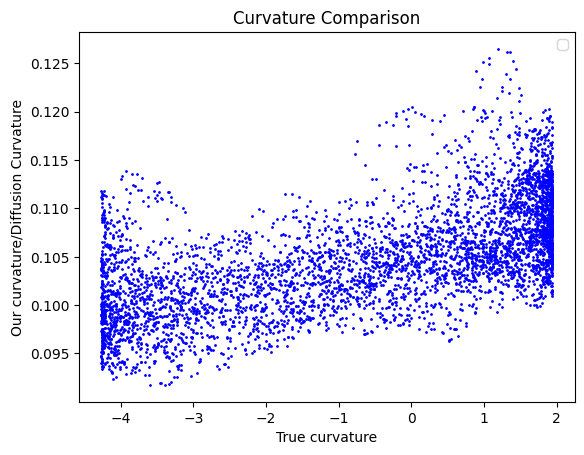

In [32]:
plt.figure()
# plt.scatter(true_curv, our_curv, s=1, c='red')
plt.scatter(true_curv, dcurv, s=1, c='blue')
plt.xlabel('True curvature')
plt.ylabel('Our curvature/Diffusion Curvature')
plt.title('Curvature Comparison')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


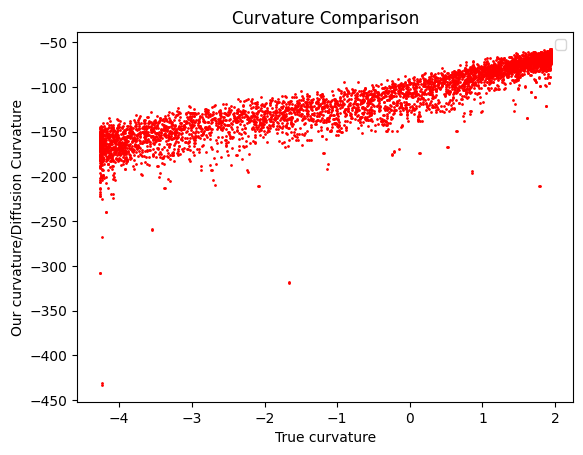

In [34]:
plt.figure()
plt.scatter(true_curv, -our_curv, s=1, c='red')
# plt.scatter(true_curv, dcurv, s=1, c='blue')
plt.xlabel('True curvature')
plt.ylabel('Our curvature/Diffusion Curvature')
plt.title('Curvature Comparison')
plt.legend()
plt.show()

In [36]:
np.corrcoef(true_curv, -our_curv)[0, 1]

0.9155970419244543

In [37]:
np.corrcoef(true_curv, dcurv)[0, 1]

0.6296972453016397

In [38]:
from sklearn.linear_model import  LinearRegression

In [40]:
lr = LinearRegression()
lr = lr.fit(our_curv.reshape(-1, 1), true_curv.reshape(-1, 1))

In [41]:
lr.coef_

array([[-0.0519748]])

In [42]:
lr.intercept_

array([5.26111179])

In [43]:
lr2 = LinearRegression()
lr2 = lr2.fit(dcurv.reshape(-1, 1), true_curv.reshape(-1, 1))

In [45]:
lr2.coef_

array([[247.90874338]])

In [44]:
lr2.intercept_

array([-26.61971488])

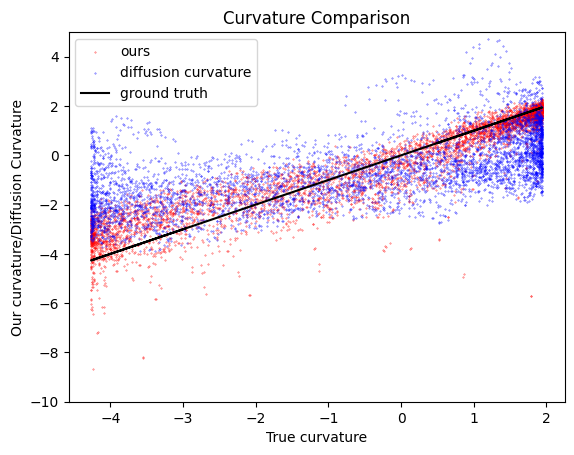

In [56]:
rescaled_our_curv = lr.predict(our_curv.reshape(-1,1)).reshape(1, -1)
rescaled_dcurv = lr2.predict(dcurv.reshape(-1,1)).reshape(1, -1)
plt.figure()
plt.scatter(true_curv, rescaled_our_curv, s=.1, alpha=.8, c='red', label='ours')
plt.scatter(true_curv, rescaled_dcurv, s=.1, alpha=0.8, c='blue', label='diffusion curvature')
plt.plot(true_curv, true_curv, c='black', label='ground truth')
plt.xlabel('True curvature')
plt.ylabel('Our curvature/Diffusion Curvature')
plt.ylim(-10,5)
plt.title('Curvature Comparison')
plt.legend()
plt.show()

NameError: name 'true_ellipsoid' is not defined